id: 2215151007

Monte Carlo Simulation Results:
(a) Estimated Average Order Size over 60 weeks: 69.53 units
(b) Average Total Cost of Having the Product: $389.07


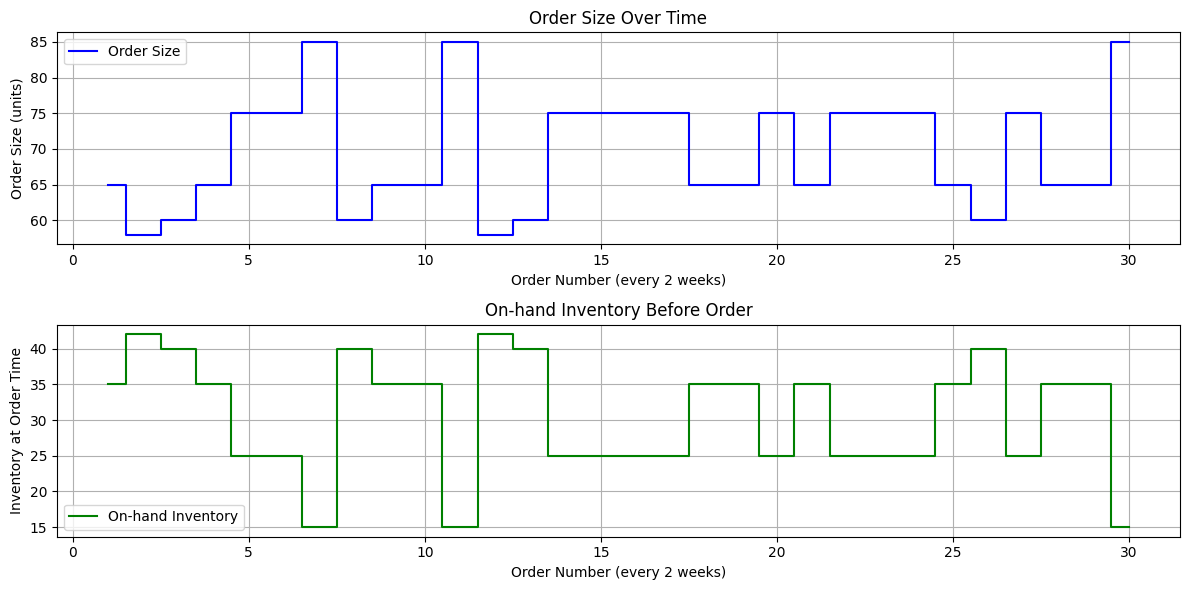

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation setup
weeks = 60
order_interval = 2
num_orders = weeks // order_interval

# On-hand inventory levels and their probabilities
inventory_levels = [15, 25, 35, 40, 42, 55]
probabilities = [0.12, 0.25, 0.35, 0.20, 0.06, 0.02]
cumulative_probs = np.cumsum(probabilities)

# Cost details
order_cost = 50
unit_cost = 4
holding_cost_per_week = 1
max_inventory = 100

# Initialize trackers
order_sizes = []
on_hand_values = []
total_order_cost = 0
total_unit_cost = 0
total_holding_cost = 0

# Set seed for reproducibility
np.random.seed(42)

# Simulate 30 orders (60 weeks)
for _ in range(num_orders):
    rand = np.random.random()

    # Select on-hand inventory based on probability
    for i, cp in enumerate(cumulative_probs):
        if rand <= cp:
            on_hand = inventory_levels[i]
            break

    on_hand_values.append(on_hand)
    order_size = max_inventory - on_hand
    order_sizes.append(order_size)

    # Accumulate costs
    total_order_cost += order_cost
    total_unit_cost += order_size * unit_cost
    total_holding_cost += on_hand * holding_cost_per_week * order_interval  # 2 weeks

# Final calculations
average_order_size = np.mean(order_sizes)
average_total_cost = (total_order_cost + total_unit_cost + total_holding_cost) / num_orders

# Output results
print("Monte Carlo Simulation Results:")
print(f"(a) Estimated Average Order Size over 60 weeks: {average_order_size:.2f} units")
print(f"(b) Average Total Cost of Having the Product: ${average_total_cost:.2f}")

# Plotting
order_indices = list(range(1, num_orders + 1))

plt.figure(figsize=(12, 6))

# Plot 1: Order size over time
plt.subplot(2, 1, 1)
plt.step(order_indices, order_sizes, where='mid', label='Order Size', color='blue')
plt.xlabel('Order Number (every 2 weeks)')
plt.ylabel('Order Size (units)')
plt.title('Order Size Over Time')
plt.grid(True)
plt.legend()

# Plot 2: On-hand inventory at order time
plt.subplot(2, 1, 2)
plt.step(order_indices, on_hand_values, where='mid', label='On-hand Inventory', color='green')
plt.xlabel('Order Number (every 2 weeks)')
plt.ylabel('Inventory at Order Time')
plt.title('On-hand Inventory Before Order')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



λ = 3, μ = 4
Customers Served: 200/200
Average Waiting Time: 0.841 units
Server Utilization: 0.733


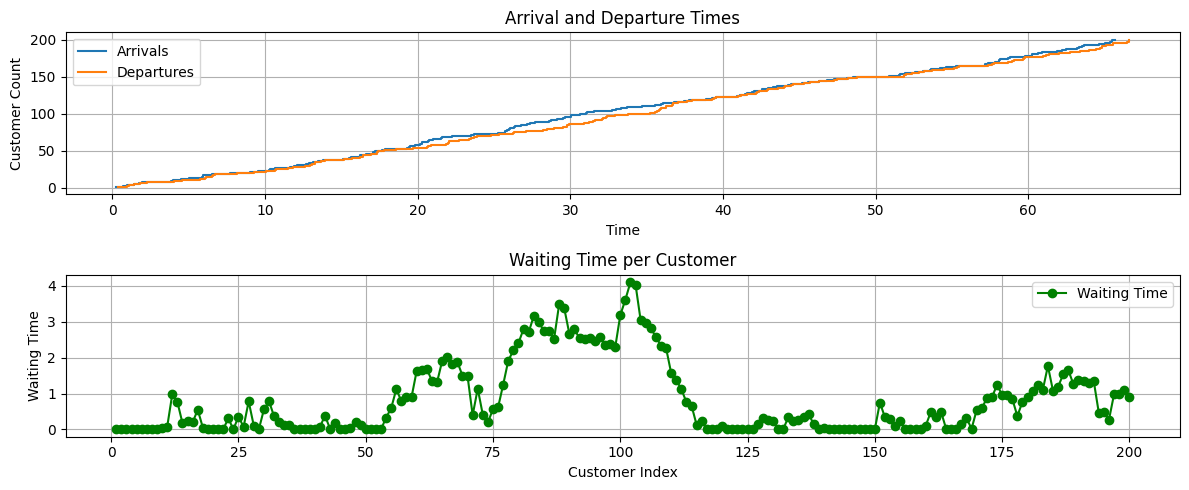


λ = 8, μ = 6
Customers Served: 200/200
Average Waiting Time: 4.498 units
Server Utilization: 0.977


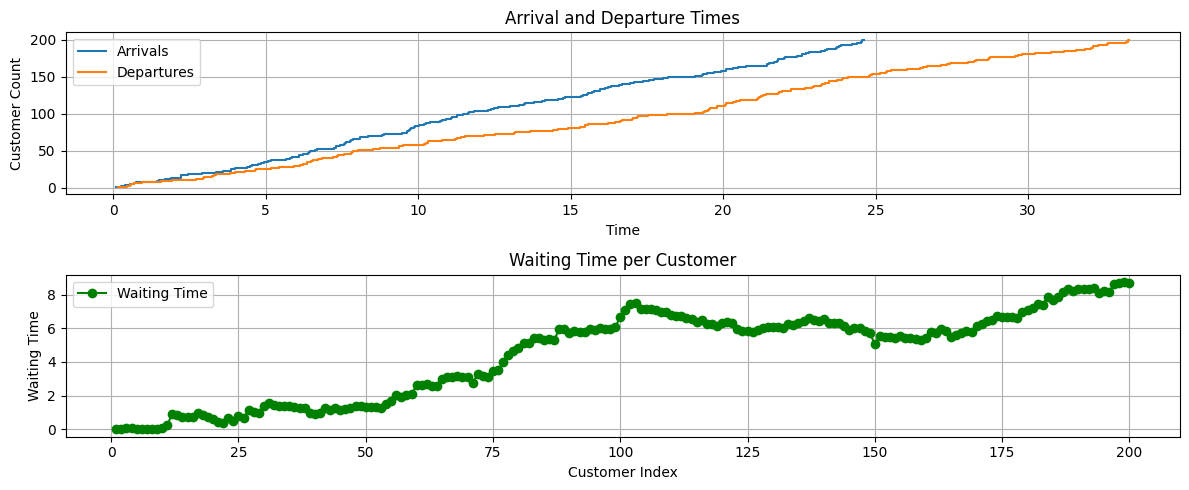


λ = 8, μ = 6
Customers Served: 186/200
Average Waiting Time: 0.677 units
Server Utilization: 1.191


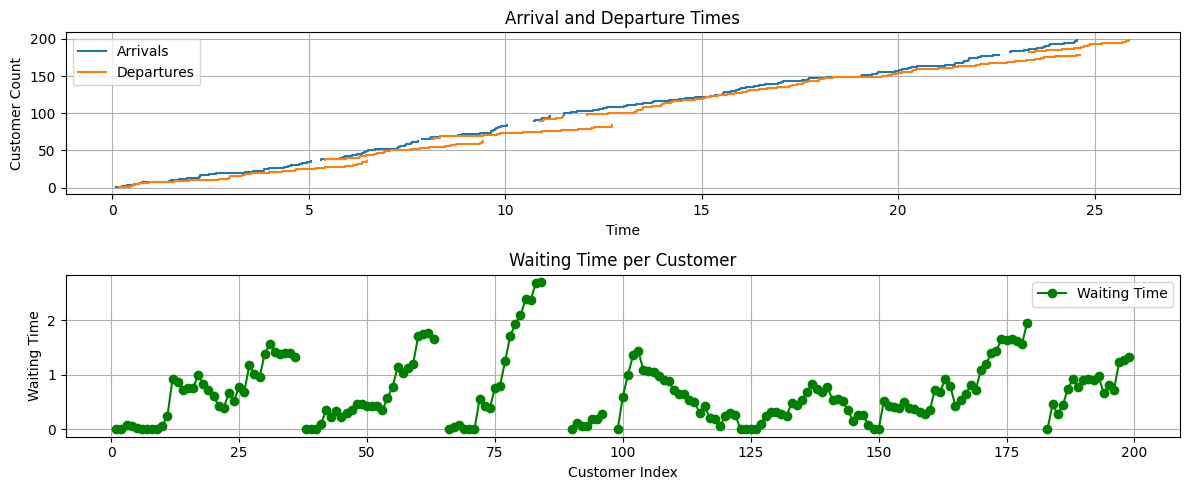

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_queue(lambda_rate, mu_rate, n_customers, queue_limit=None):
    np.random.seed(0)  # for reproducibility

    # Generate interarrival and service times
    inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
    service_times = np.random.exponential(1/mu_rate, n_customers)
    arrival_times = np.cumsum(inter_arrival_times)

    # Initialize
    start_service_times = np.zeros(n_customers)
    end_service_times = np.zeros(n_customers)
    waiting_times = np.zeros(n_customers)
    served = 0

    for i in range(n_customers):
        if i == 0:
            start_service_times[i] = arrival_times[i]
        else:
            start_service_times[i] = max(arrival_times[i], end_service_times[i-1])

        # Check queue limit if provided
        if queue_limit is not None and i > 0:
            in_queue = sum((arrival_times[i] < end_service_times[:i]) & (start_service_times[:i] > arrival_times[i]))
            if in_queue >= queue_limit:
                arrival_times[i] = np.nan
                start_service_times[i] = np.nan
                end_service_times[i] = np.nan
                waiting_times[i] = np.nan
                continue

        end_service_times[i] = start_service_times[i] + service_times[i]
        waiting_times[i] = start_service_times[i] - arrival_times[i]
        served += 1

    # Metrics
    busy_time = np.nansum(service_times[:served])
    total_time = np.nanmax(end_service_times)
    utilization = busy_time / total_time
    average_waiting_time = np.nanmean(waiting_times)

    # Results
    print(f"\nλ = {lambda_rate}, μ = {mu_rate}")
    print(f"Customers Served: {served}/{n_customers}")
    print(f"Average Waiting Time: {average_waiting_time:.3f} units")
    print(f"Server Utilization: {utilization:.3f}")

    # Plotting
    plt.figure(figsize=(12, 5))

    # Plot 1: Arrival and Departure Times
    plt.subplot(2, 1, 1)
    plt.step(arrival_times, np.arange(1, n_customers + 1), label='Arrivals', where='post')
    plt.step(end_service_times, np.arange(1, n_customers + 1), label='Departures', where='post')
    plt.xlabel('Time')
    plt.ylabel('Customer Count')
    plt.title('Arrival and Departure Times')
    plt.grid(True)
    plt.legend()

    # Plot 2: Waiting Time for Each Customer
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(1, n_customers + 1), waiting_times, 'go-', label='Waiting Time')
    plt.xlabel('Customer Index')
    plt.ylabel('Waiting Time')
    plt.title('Waiting Time per Customer')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


# Task 1: λ = 3, μ = 4
simulate_queue(lambda_rate=3, mu_rate=4, n_customers=200)

# Task 2: λ = 8, μ = 6 (Overload)
simulate_queue(lambda_rate=8, mu_rate=6, n_customers=200)

# Task 3: λ = 8, μ = 6, queue limit = 10
simulate_queue(lambda_rate=8, mu_rate=6, n_customers=200, queue_limit=10)
